### Import needed libraries 

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity, sigmoid_kernel
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials
import cred
import matplotlib.pyplot as plt
import seaborn as sns
from HelpfulClasses.Plots import Plots


### Loading data

In [15]:
data = pd.read_csv('data.csv')
data

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


# Understanding the dataset

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

# Convert release_date to Datetime 

In [17]:
data['release_date'] = pd.to_datetime(data['release_date'])

# Remove unwanted characters in artists names 

In [18]:
data['artists'] = data['artists'].str.replace('[^\w\s]', '')
data['artists']

/tmp/ipykernel_20603/1200601609.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['artists'] = data['artists'].str.replace('[^\w\s]', '')


0         Sergei Rachmaninoff James Levine Berliner Phil...
1                                                Dennis Day
2         KHP Kridhamardawa Karaton Ngayogyakarta Hadini...
3                                              Frank Parker
4                                                Phil Regan
                                ...                        
170648         Anuel AA Daddy Yankee KAROL G Ozuna J Balvin
170649                                             Ashnikko
170650                                              MAMAMOO
170651                                               Eminem
170652                                       KEVVO J Balvin
Name: artists, Length: 170653, dtype: object

In [19]:
artists_count_of_songs = data['artists'].value_counts()
artists_count_of_songs

Эрнест Хемингуэй                     1211
Эрих Мария Ремарк                    1068
Francisco Canaro                      942
Frank Sinatra                         630
Ignacio Corsini                       628
                                     ... 
Xristos Konitopoulos                    1
Pyari                                   1
Saleem Raza Kousar Parveen              1
Γεράσιμος Σάγιας Δημήτρης Γκόγκος       1
KEVVO J Balvin                          1
Name: artists, Length: 34077, dtype: int64

In [20]:
extra_active_artists = data[data['artists'].isin(artists_count_of_songs[artists_count_of_songs >= 500].index)] 

extra_active_artists['artists'].value_counts()

Эрнест Хемингуэй     1211
Эрих Мария Ремарк    1068
Francisco Canaro      942
Frank Sinatra         630
Ignacio Corsini       628
Elvis Presley         504
Name: artists, dtype: int64

# Doing some Curiosity (EDA)

In [21]:
artist_valences = extra_active_artists.groupby('artists')['valence', 'release_date'].agg(lambda x: list(x))
artist_names = list(artist_valences.index)
len(artist_valences.iloc[2, 1])
artist_valences

/tmp/ipykernel_20603/4077005226.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  artist_valences = extra_active_artists.groupby('artists')['valence', 'release_date'].agg(lambda x: list(x))


,valence,release_date
artists,,
Elvis Presley,"[0.962, 0.256, 0.856, 0.912, 0.166999999999999...","[1956-03-23 00:00:00, 1956-03-23 00:00:00, 195..."
Francisco Canaro,"[0.807, 0.444, 0.618, 0.733, 0.89, 0.424, 0.61...","[1923-07-09 00:00:00, 1923-07-09 00:00:00, 192..."
Frank Sinatra,"[0.206, 0.273, 0.134, 0.198, 0.263, 0.632, 0.6...","[1939-01-01 00:00:00, 1939-01-01 00:00:00, 194..."
Ignacio Corsini,"[0.721, 0.578, 0.422, 0.425, 0.403, 0.614, 0.5...","[1921-03-20 00:00:00, 1921-03-20 00:00:00, 192..."
Эрих Мария Ремарк,"[0.423, 0.59, 0.855, 0.563, 0.613, 0.655999999...","[1929-01-01 00:00:00, 1929-01-01 00:00:00, 192..."
Эрнест Хемингуэй,"[0.573, 0.496, 0.285, 0.596, 0.492000000000000...","[1926-01-01 00:00:00, 1926-01-01 00:00:00, 192..."


No handles with labels found to put in legend.


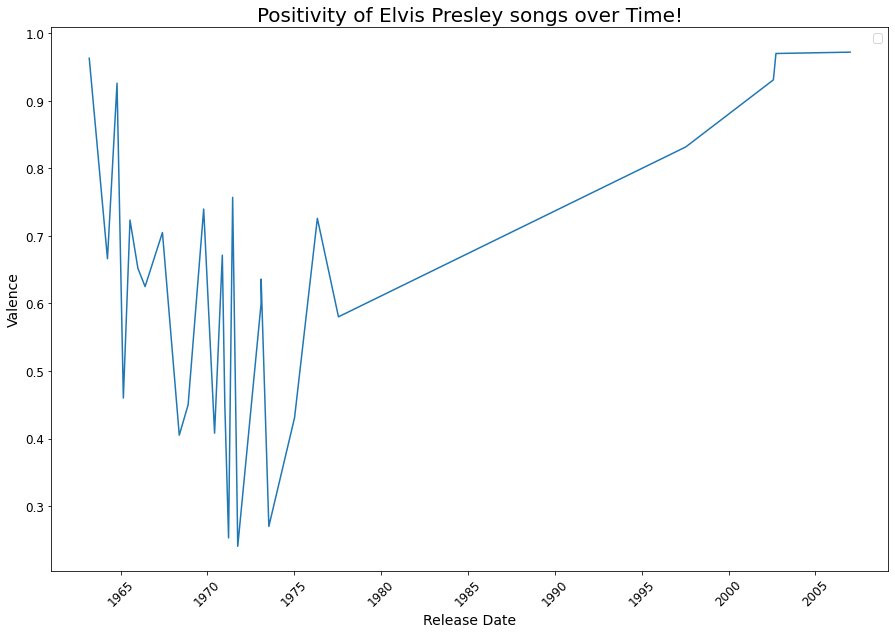

No handles with labels found to put in legend.


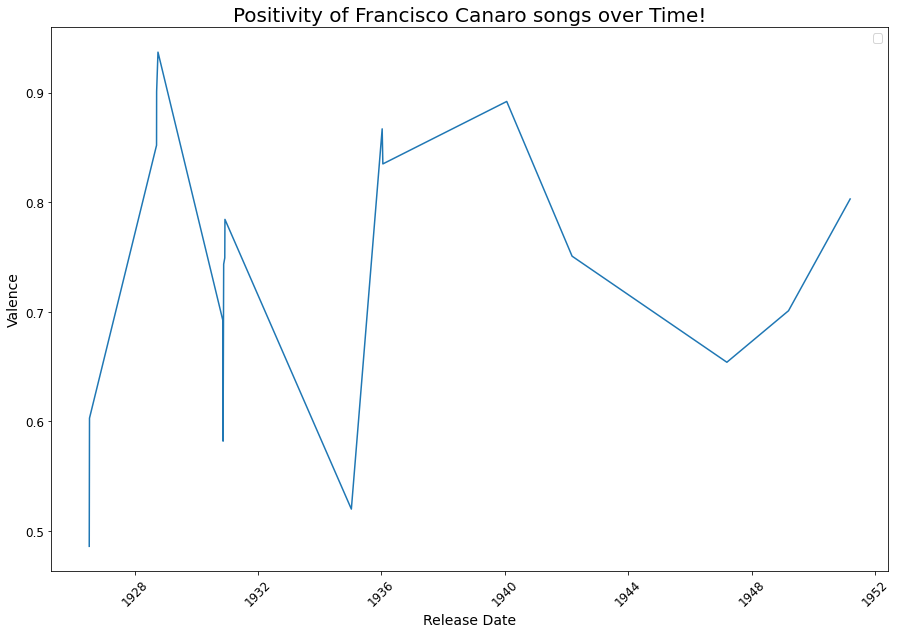

No handles with labels found to put in legend.


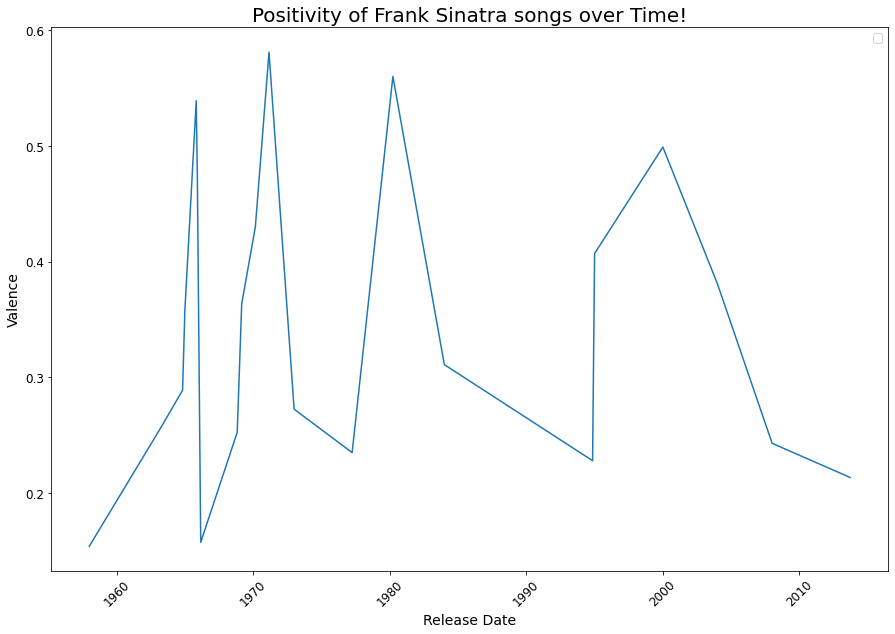

No handles with labels found to put in legend.


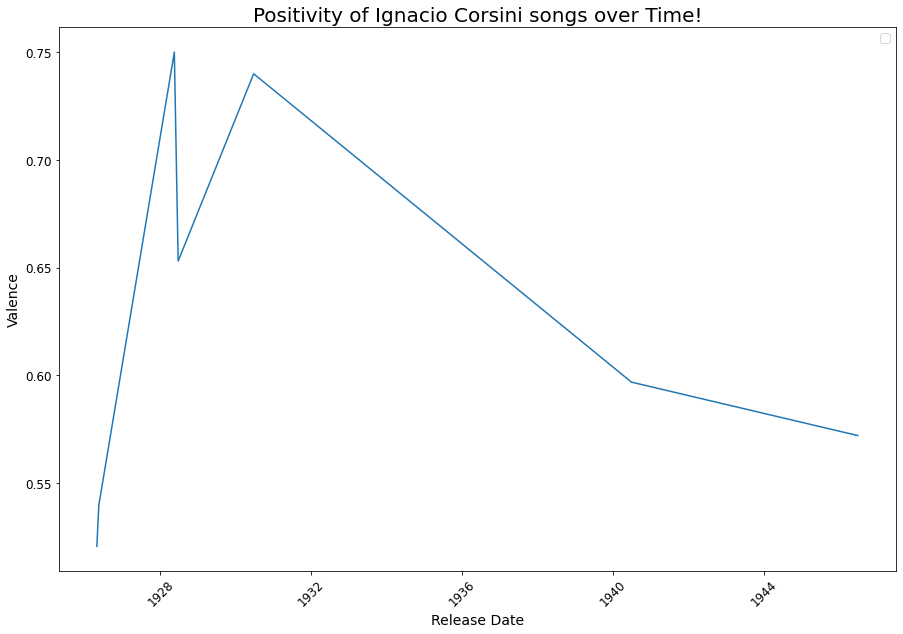

No handles with labels found to put in legend.


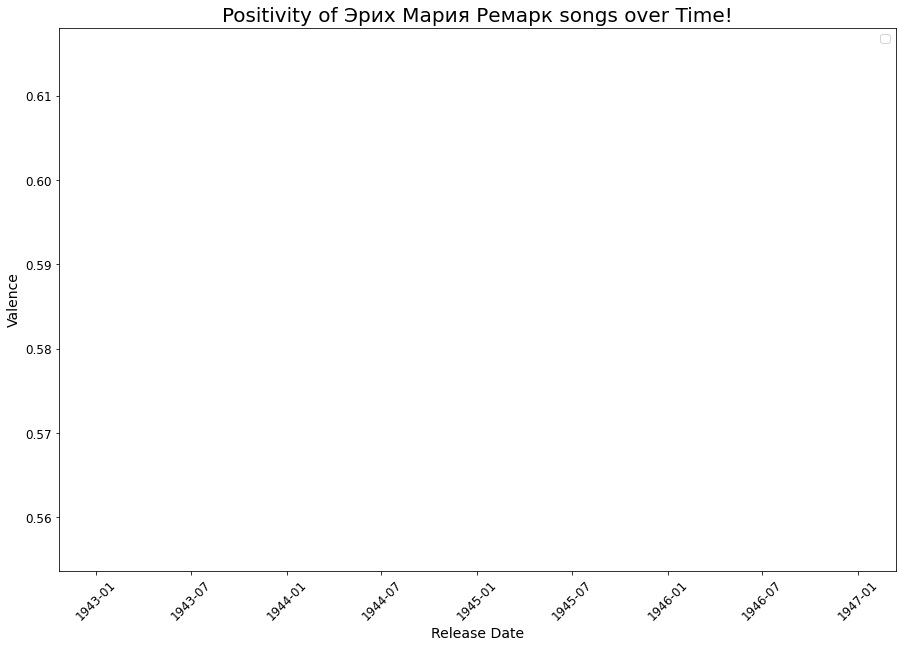

No handles with labels found to put in legend.


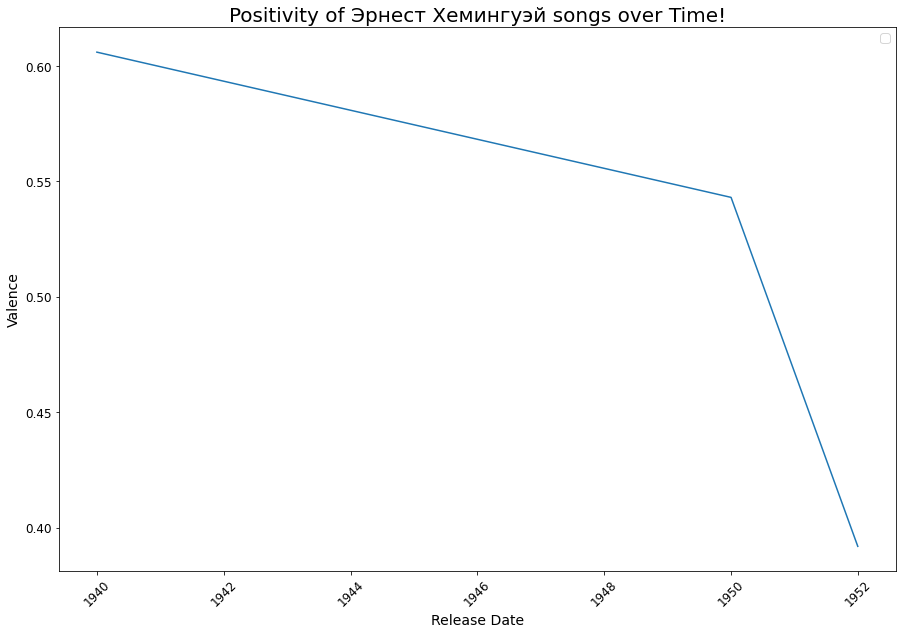

In [22]:
plts = Plots()
for i in range(len(artist_names)):
    plts.data_line_plot(x = artist_valences.iloc[i, 1][-50:], y = artist_valences.iloc[i, 0][-50:], xlabel = 'Release Date',  
    ylabel = "Valence", title = 'Positivity of ' + artist_names[i] + ' songs over Time!', xticks_rotation = 45)

# Check to see if danceability of a song can cause poplularity for it 

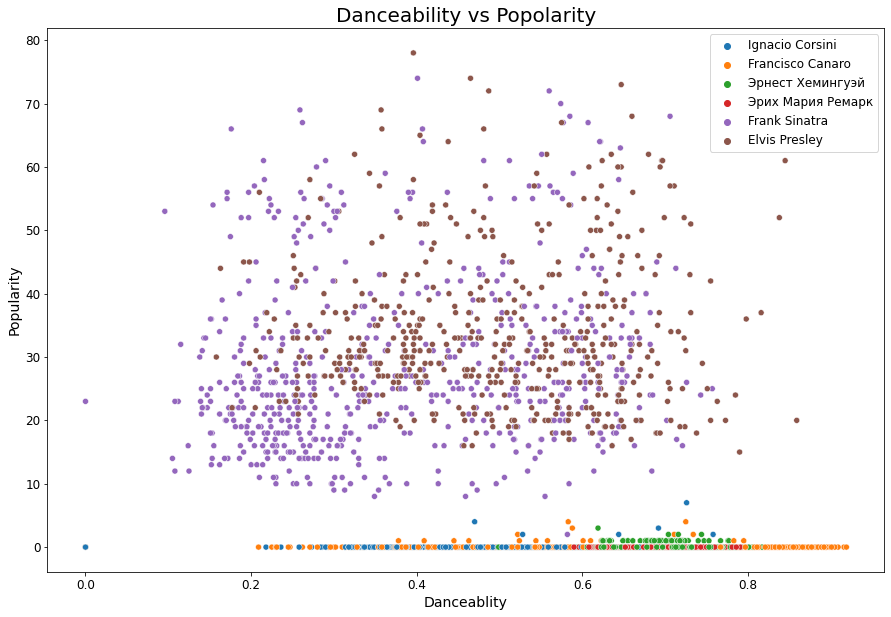

In [23]:
plts.data_scatter_plot(x = extra_active_artists['danceability'], y = extra_active_artists['popularity'], xlabel = 'Danceablity', ylabel = 'Popularity', title = 'Danceability vs Popolarity', colors = extra_active_artists['artists'])

# Scaling the numerical features

In [24]:
feature_columns = ['acousticness', 'danceability', 'duration_ms', 'energy',
                  'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
                  'speechiness', 'tempo', 'valence',]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data[feature_columns])

# Building Recommender System using Cosine Similarity

In [26]:
indeces = pd.Series(data.index, index = data['name']).drop_duplicates()
indeces

cosine = cosine_similarity(X_scaled[:500, :])
cosine.shape

def recommender(song_name, model_type = cosine):
    index = indeces[song_name]
    score = list(enumerate(model_type[indeces[song_name]]))
    similarity_score = sorted(score, key = lambda x: x[1], reverse = True)[1:4]
    top_songs_index = [i[0] for i in similarity_score]    
    top_songs = data['name'].iloc[top_songs_index]
    
    return top_songs

print("Recommended Songs:")
print(recommender('Clancy Lowered the Boom',cosine).values)


Recommended Songs:
["D'la Vraie Amour" 'Avec bidasse' "Si Vous N'aimez Pas Ca"]
